<a href="https://colab.research.google.com/github/Aldistwn29/Data_analysis/blob/main/Booking_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,01/07/2015,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,7,27,1,01/07/2015,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,7,27,1,01/07/2015,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,7,27,1,01/07/2015,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,7,27,1,01/07/2015,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


# Cleaning data

In [30]:
df.shape

(119390, 33)

In [31]:
# menghapus missing veleus
missing_values = df.isnull().sum()
print(f"\nmissing values:\n {missing_values}")


missing values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
arrival                                0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           

In [32]:
# menghapus missing values
clean_df = df.dropna()
print(f"missing values: {clean_df.isnull().sum()}")

missing values: hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
arrival                           0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_typ

In [33]:
# melihat nilai yg duplikat
print(f"duplikat: {clean_df.duplicated().sum()}")

# menghapus duplikat
clean_df = clean_df.drop_duplicates()
print(f"data yg sudah di hapus duplikatnya: {clean_df.duplicated().sum()}")

duplikat: 28
data yg sudah di hapus duplikatnya: 0


In [34]:
clean_df.shape

(189, 33)

In [35]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 2392 to 116451
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           189 non-null    object 
 1   is_canceled                     189 non-null    int64  
 2   lead_time                       189 non-null    int64  
 3   arrival_date_year               189 non-null    int64  
 4   arrival_date_month              189 non-null    int64  
 5   arrival_date_week_number        189 non-null    int64  
 6   arrival_date_day_of_month       189 non-null    int64  
 7   arrival                         189 non-null    object 
 8   stays_in_weekend_nights         189 non-null    int64  
 9   stays_in_week_nights            189 non-null    int64  
 10  adults                          189 non-null    int64  
 11  children                        189 non-null    float64
 12  babies                          189

In [36]:
# mengubah tipe data dari kolom arrival menjadi date
clean_df['arrival'] = pd.to_datetime(clean_df['arrival'], format='%d/%m/%Y')

In [37]:
# mengubah tipe data kolom reevation_status_data jadi date
clean_df['reservation_status_date'] = pd.to_datetime(clean_df['reservation_status_date'], format='%d/%m/%Y')

In [113]:
# mengubah arival_date_year menjadi tipe data date
clean_df['arrival_date_year'] = pd.to_datetime(clean_df['arrival_date_year'], format='%Y')

In [114]:
# mengubah arival_date_month menajadi tipe data date
clean_df['arrival_date_month'] = pd.to_datetime(clean_df['arrival_date_month'], format='%m')

In [115]:
# # mengubah tipe data arival_date_week menjadu tipe data date
clean_df['arrival_date_day_of_month'] = pd.to_datetime(clean_df['arrival_date_day_of_month'], format='%d')

In [38]:
clean_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,10,42,11,2015-10-11,2,0,...,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,10,44,26,2015-10-26,7,15,...,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,11,45,3,2015-11-03,0,3,...,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,11,45,3,2015-11-03,2,10,...,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,11,45,3,2015-11-03,3,10,...,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16


In [39]:
# membuat kolom baru total pengunjung
clean_df['visitor'] = clean_df['adults'] + clean_df['children'] + clean_df['babies']


In [116]:
# menampilkan nama kolom dalam dataset
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 2392 to 116451
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           189 non-null    object        
 1   is_canceled                     189 non-null    int64         
 2   lead_time                       189 non-null    int64         
 3   arrival_date_year               189 non-null    datetime64[ns]
 4   arrival_date_month              189 non-null    datetime64[ns]
 5   arrival_date_week_number        189 non-null    int64         
 6   arrival_date_day_of_month       189 non-null    datetime64[ns]
 7   arrival                         189 non-null    datetime64[ns]
 8   stays_in_weekend_nights         189 non-null    int64         
 9   stays_in_week_nights            189 non-null    int64         
 10  adults                          189 non-null    int64         
 11  child

In [41]:
# membuat status booking
status_bokking = clean_df['is_canceled'].value_counts().rename(index={0:'valid', 1:'non-valid'})
print(f'status booking:\n {status_bokking}')

# reservation_status
category_booking = clean_df['reservation_status'].value_counts()
print(f'\ncategory booking:\n {category_booking}')

# menghitung nilai booking berdasarkan jenis hotel
booking_value_by_hotel = clean_df.groupby('hotel')['adr'].agg(['mean','sum','count'])
print(f'\nnilai booking bedasarkan jenis hotel:\n {booking_value_by_hotel}')

status booking:
 is_canceled
valid        173
non-valid     16
Name: count, dtype: int64

category booking:
 reservation_status
Check-Out    173
Canceled      12
No-Show        4
Name: count, dtype: int64

nilai booking bedasarkan jenis hotel:
                     mean      sum  count
hotel                                   
City Hotel    107.730769  4201.50     39
Resort Hotel   53.643267  8046.49    150


In [42]:
# membuat summary sederhana
summary = clean_df.agg({
    'is_canceled': ['mean', 'sum', 'std'],
    'adr' : ['mean', 'sum', 'std'],
    'visitor': ['mean', 'sum', 'std']
})
print(f"summary data:\n {summary}")

summary data:
       is_canceled           adr     visitor
mean     0.084656     64.804180    1.465608
sum     16.000000  12247.990000  277.000000
std      0.279109     40.186506    0.623248


# Visualisasi

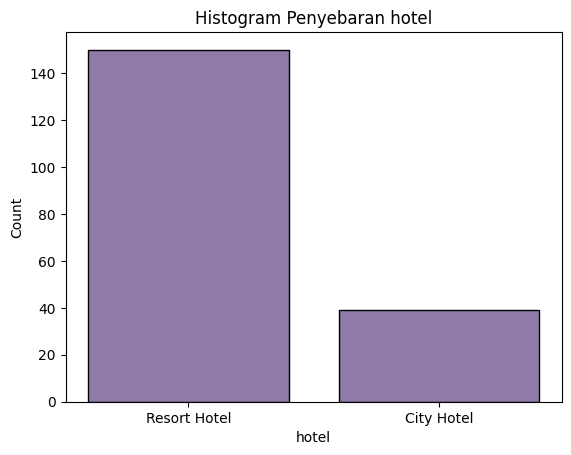

In [64]:
# Histogram penyebaran hotel
sns.histplot(clean_df['hotel'], shrink=.8, color='#694F8E')
plt.title('Histogram Penyebaran hotel')
plt.show()



> Untuk Visualisasi di atas di dapatkan Resort Hotel memiliki distribusi data yg paling besar, artinya memiliki banyak yg pemesanan bila di bandingkan dengan city hotel, hal ini menunjukan lebih banyak pengunjung yg menginap di Resort Hotel.





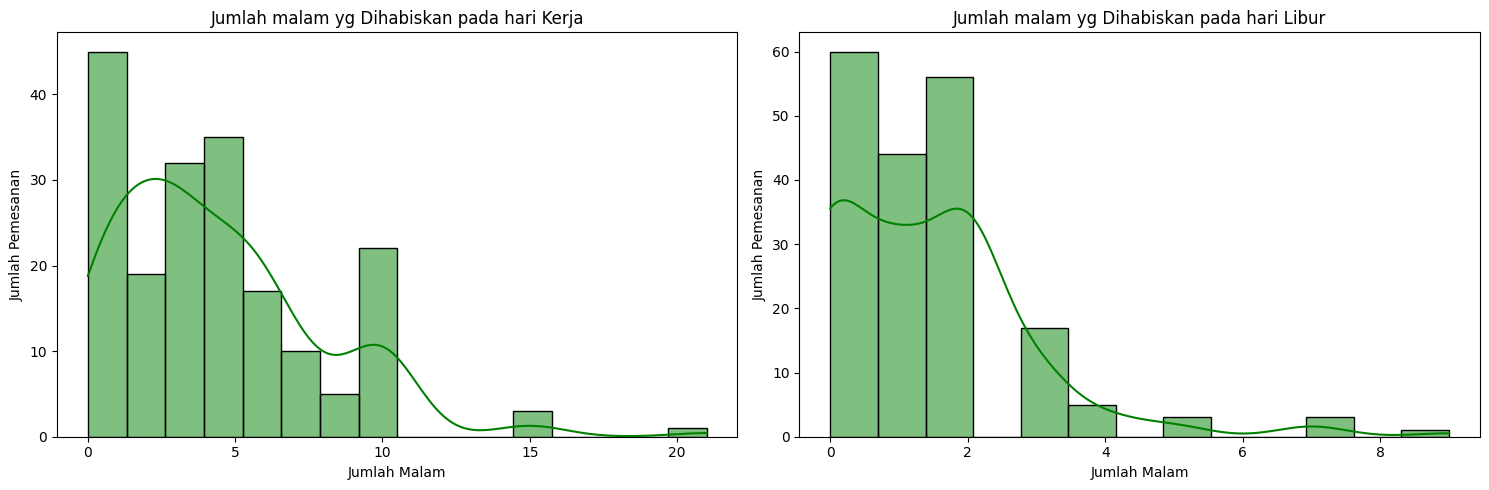

In [90]:
# Visualisasi jumlah malam yg di habiskan
fig, ax= plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(clean_df['stays_in_week_nights'], ax=ax[0], color='green', kde=True)
ax[0].set_title('Jumlah malam yg Dihabiskan pada hari Kerja')
ax[0].set_xlabel('Jumlah Malam')
ax[0].set_ylabel('Jumlah Pemesanan')

sns.histplot(clean_df['stays_in_weekend_nights'], ax=ax[1], color='green', kde=True)
ax[1].set_title('Jumlah malam yg Dihabiskan pada hari Libur')
ax[1].set_xlabel('Jumlah Malam')
ax[1].set_ylabel('Jumlah Pemesanan')

plt.tight_layout()
plt.show()



>





> Terlihat dari dua perbandingan di atas, dimana orang lebih cenderung menghabiskan waktu di penginapan pada hari libur, rentang hari yg dihabiskan puncaknya yaitu 2-4 malam, sedangkan di hari kerja itu dari 0-2 malam yg dihabiskan.



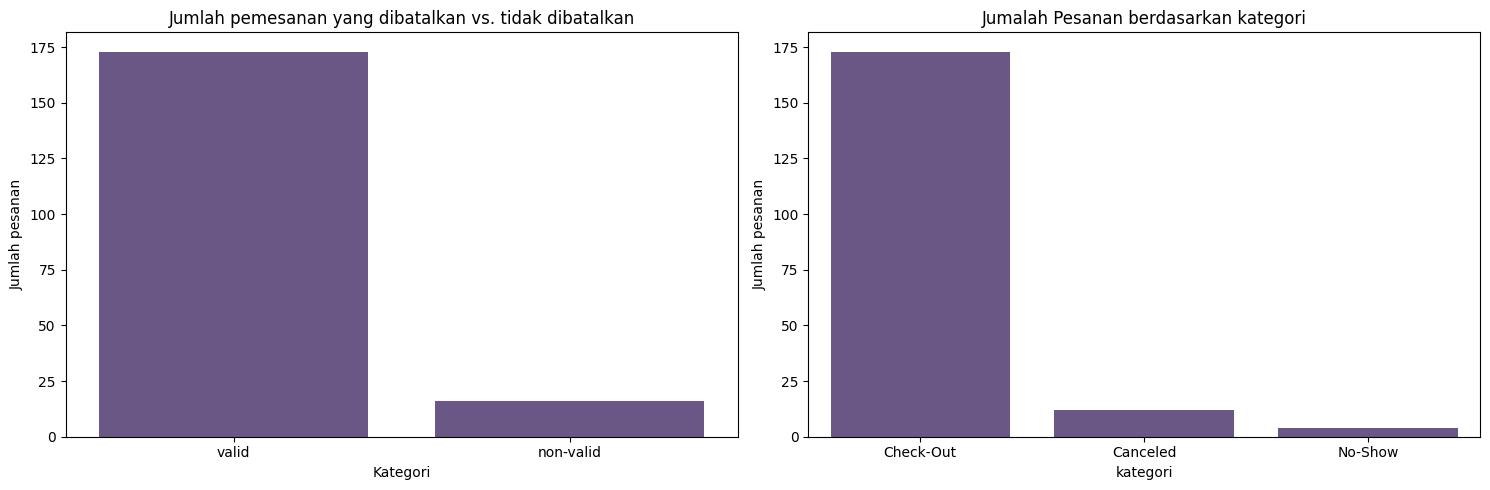

In [99]:
# jumlah pemesanan yang dibatalkan vs. tidak dibatalkan
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(status_bokking, ax=ax[0], color='#694F8E')
ax[0].set_title('Jumlah pemesanan yang dibatalkan vs. tidak dibatalkan')
ax[0].set_xlabel('Kategori')
ax[0].set_ylabel('Jumlah pesanan')

sns.barplot(category_booking, ax=ax[1], color='#694F8E')
ax[1].set_title('Jumalah Pesanan berdasarkan kategori')
ax[1].set_xlabel('kategori')
ax[1].set_ylabel('Jumlah pesanan')

plt.tight_layout()
plt.show()



>Visualisi 1:  Dapat dilihat pada visualisasi diatas jumlah pemesan yg dibatalkan itu cukup rendah, artinya pelanggan kebanyakan puas dengan layanan yg diberikan. akan tetapi perlu analisis lebih lanjut terkait faktor apa yg menyebabkan pembatalan sehingga bisa memakasimalkan untuk meningkatkan pelayanan pelanggan.



> Visualisasi ke 2 : pada categori 'check out' lebih tinggi bila dibandingkan 'canceled' dan 'no show'. artinya pelanggan sebagian besar pelanggan menyelesaikan proses pemesanan mereka.





In [125]:
# Membuat kolom 'month_year' dari kolom 'arrival'
clean_df['month_year'] = clean_df['arrival'].dt.to_period('M')

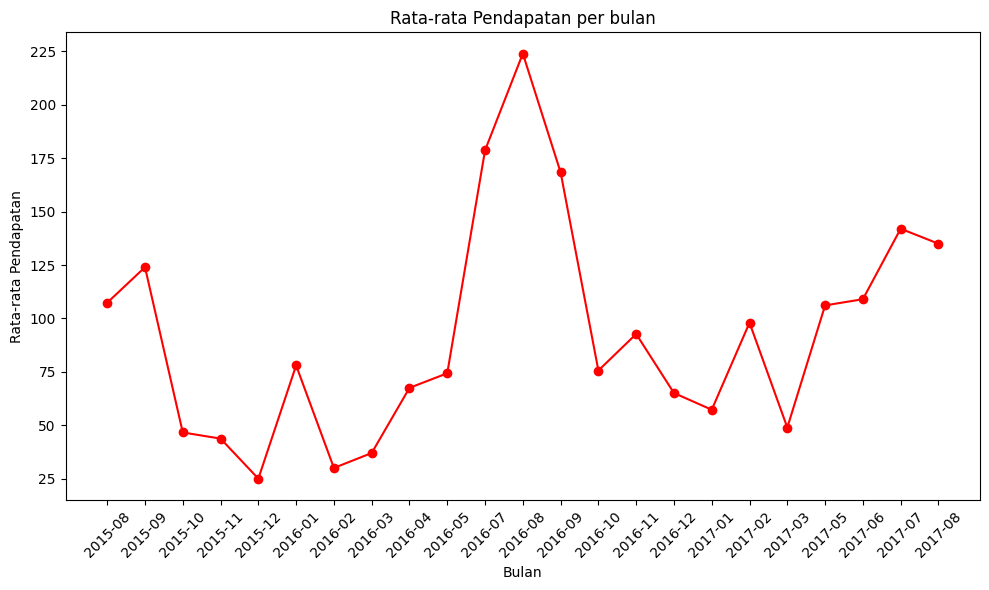

In [155]:
# line chart rata-rata pendapatan
date_adr = clean_df.groupby('month_year')['adr'].mean()

plt.figure(figsize=(10,6))
plt.plot(date_adr.index.astype(str), date_adr.values, marker='o', color='red')
plt.title('Rata-rata Pendapatan per bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Pendapatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> pada 2015-2017 trend pendapatnya itu fluktuatif,terjadi peningkatan yg tinggi di tahun 2016-08, akan tetapi pada awal tahun 2017 grafik menunjukan penurunan. perlu analisis lebih dalam lagi terkait penurunan itu di sebabkan oleh faktor apa. tetapi setelah terjadi penurunan pendapatan menunjukan pola yg konsisten walaupun lebih  rendah di bandingkan puncaknya.



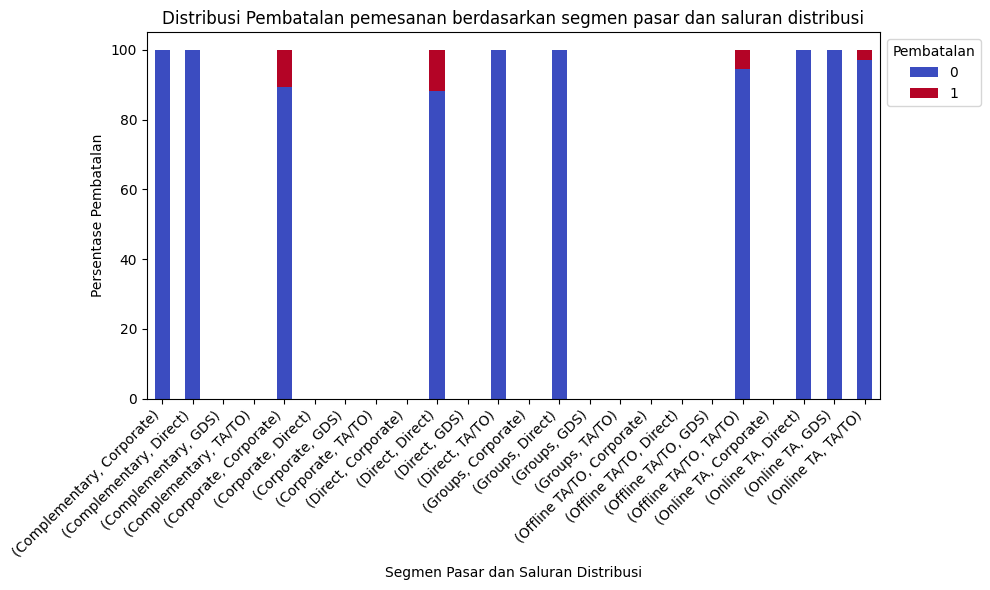

In [164]:
# mengconversi kolom is_canclead menajadi categori
clean_df['is_canceled'] = clean_df['is_canceled'].astype('category')

# menggabungkan data
group_data = clean_df.groupby(['market_segment', 'distribution_channel', 'is_canceled']).size().unstack(fill_value=0)

# menghitung total pemesanan berdasarkan 'market_segment' dan 'distribution_channel'
total_pemesanan = group_data.sum(axis=1)

# menghitung persentasinya
group_data_percent = group_data.div(total_pemesanan, axis=0) * 100

# membuat plot

fig, ax = plt.subplots(figsize=(10, 6))
group_data_percent.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

plt.title('Distribusi Pembatalan pemesanan berdasarkan segmen pasar dan saluran distribusi')
plt.xlabel('Segmen Pasar dan Saluran Distribusi')
plt.ylabel('Persentase Pembatalan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pembatalan', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



> Pada Visualisasi Diatas menunjukan bahwa perusahaan memiliki tingkat pemebatalan yg baik di semua segemen, akan tetapi perlu analisis lebih lanjut lagu mengenai alasan di balik pembatalan, agar perusahaan bisa meningkatakan pelayanan



<ipython-input-170-fd73c9b0b748>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deposit_counts.index, y=deposit_counts.values, palette='Set3')


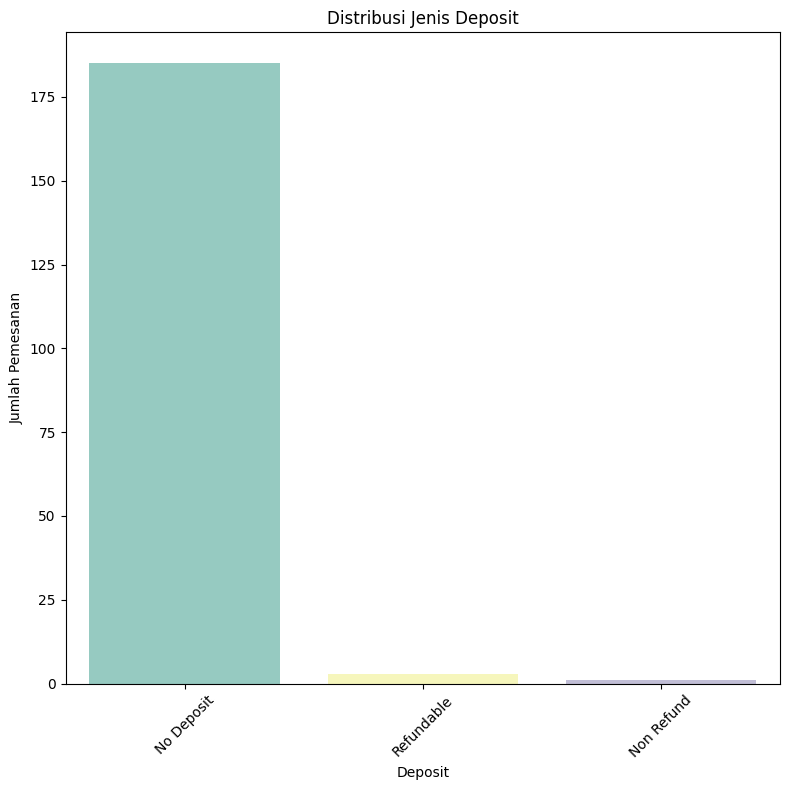

In [170]:
# menghitung jumlah pemesanan untuk setiap deposit
deposit_counts = clean_df['deposit_type'].value_counts()

# Membuat Bar Chart
plt.figure(figsize=(8, 8))
sns.barplot(x=deposit_counts.index, y=deposit_counts.values, palette='Set3')
plt.xlabel('Deposit')
plt.ylabel('Jumlah Pemesanan')
plt.title('Distribusi Jenis Deposit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> Terlihat trand pelanggan melakuakan pembayaran tanapa deposit mencerminkan kebijakan ini lebih flesibel dengan atau prefensi pelanggan tidak membayar di awal

> Strategi pemasaran, pihak hotel dapat menjadikan informasi ini untuk sebagai strategi pemasaran mereka, dengan menonjolkan kebijakan tanpa deposit
